## Problem Statement

This project focuses on building a convolutional neural network (CNN) model to accurately detect melanoma, a type of cancer that can be deadly if not detected early. The model uses a custom architecture implemented in TensorFlow.

### Dataset

The dataset used for training and evaluation consists of 2,357 images of malignant and benign oncological diseases. The images were obtained from the International Skin Imaging Collaboration (ISIC) and categorized into the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

The dataset is divided into training and test sets, with a specific class distribution

### Project Pipeline

- Data Reading/Data Understanding: The code reads and loads the dataset from the specified directories.

- Dataset Creation: The code creates train and validation datasets using the ImageDataGenerator from TensorFlow. It resizes the images to 180x180 pixels and applies rescaling.

- Dataset Visualization: The code visualizes one instance of each of the nine classes present in the dataset using matplotlib.

- Model Building & Training: The code builds a CNN model for multiclass classification. The model consists of convolutional and pooling layers, followed by fully connected layers. It uses the Adam optimizer and categorical cross-entropy loss function. The model is trained for approximately 20 epochs.

- Findings after Model Fit: The code analyzes the training and validation accuracy and loss over epochs to assess any evidence of overfitting or underfitting.

- Data Reading/Data Understanding: The code reads and loads the dataset from the specified directories.

- Dataset Creation: The code creates train and validation datasets using the ImageDataGenerator from TensorFlow. It resizes the images to 180x180 pixels and applies rescaling.

- Dataset Visualization: The code visualizes one instance of each of the nine classes present in the dataset using matplotlib.

- Model Building & Training: The code builds a CNN model for multiclass classification. The model consists of convolutional and pooling layers, followed by fully connected layers. It uses the Adam optimizer and categorical cross-entropy loss function. The model is trained for approximately 20 epochs.

- Findings after Model Fit: The code analyzes the training and validation accuracy and loss over epochs to assess any evidence of overfitting or underfitting.

- Data Reading/Data Understanding: The code reads and loads the dataset from the specified directories.

- Dataset Creation: The code creates train and validation datasets using the ImageDataGenerator from TensorFlow. It resizes the images to 180x180 pixels and applies rescaling.

- Dataset Visualization: The code visualizes one instance of each of the nine classes present in the dataset using matplotlib.

- Model Building & Training: The code builds a CNN model for multiclass classification. The model consists of convolutional and pooling layers, followed by fully connected layers. It uses the Adam optimizer and categorical cross-entropy loss function. The model is trained for approximately 20 epochs.

- Findings after Model Fit: The code analyzes the training and validation accuracy and loss over epochs to assess any evidence of overfitting or underfitting.

### Data Reading and understanding

In [2]:
import os

train_path = 'Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train'
test_path = 'Downloads/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test'

train_filenames = os.listdir(train_path)
test_filenames = os.listdir(test_path)

### Dataset Creation

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
# Data augmentation for training dataset
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
# Rescale images and create train dataset
train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 2595 images belonging to 10 classes.


In [6]:
# Rescale images and create validation dataset
val_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 644 images belonging to 10 classes.


 ### Dataset Visualization

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Get one instance of each class
classes = train_dataset.class_indices
class_labels = list(classes.keys())

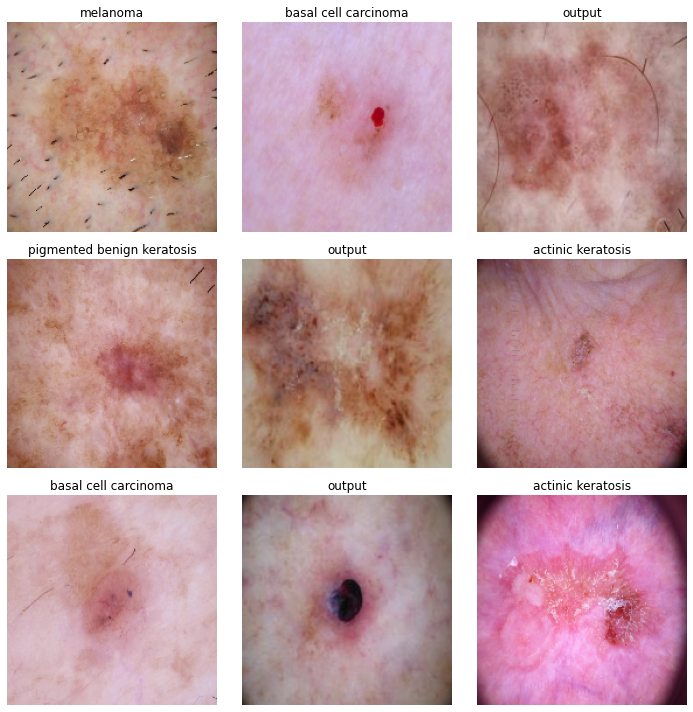

In [14]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axs.flat):
    images, labels = next(train_dataset)
    ax.imshow(images[0])
    ax.set_title(class_labels[labels[0].argmax()])
    ax.axis('off')

plt.tight_layout()
plt.show()

### Model Building and Training

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [20]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [21]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
# Train the model
history = model.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
82/82 [==============================] - 79s 947ms/step - loss: 2.0432 - accuracy: 0.3013 - val_loss: 1.9736 - val_accuracy: 0.2050
Epoch 2/20
82/82 [==============================] - 78s 953ms/step - loss: 1.8325 - accuracy: 0.3148 - val_loss: 1.8214 - val_accuracy: 0.3866
Epoch 3/20
82/82 [==============================] - 80s 982ms/step - loss: 1.6817 - accuracy: 0.3395 - val_loss: 1.8709 - val_accuracy: 0.2904
Epoch 4/20
82/82 [==============================] - 80s 970ms/step - loss: 1.6133 - accuracy: 0.3588 - val_loss: 1.7898 - val_accuracy: 0.2981
Epoch 5/20
82/82 [==============================] - 80s 984ms/step - loss: 1.6106 - accuracy: 0.3538 - val_loss: 1.8943 - val_accuracy: 0.2780
Epoch 6/20
82/82 [==============================] - 86s 1s/step - loss: 1.5407 - accuracy: 0.3788 - val_loss: 1.8143 - val_accuracy: 0.2655
Epoch 7/20
82/82 [==============================] - 94s 1s/step - loss: 1.4972 - accuracy: 0.3965 - val_loss: 1.8273 - val_accuracy: 0.2500
Epoch

### Findings after model fit

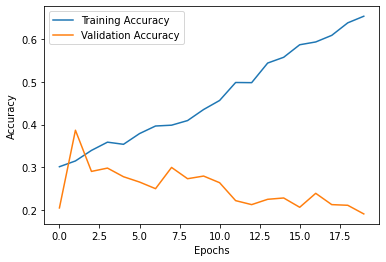

In [23]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

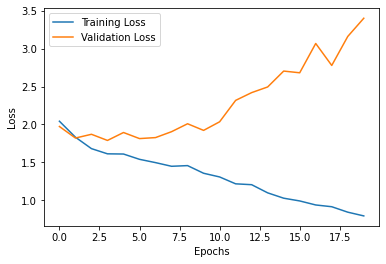

In [24]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

###  Data Augmentation to Resolve Underfitting/Overfitting

In [25]:
augmented_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [26]:
# Create augmented train dataset
augmented_train_dataset = augmented_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 2595 images belonging to 10 classes.


In [27]:
# Rescale images and create augmented validation dataset
augmented_val_dataset = augmented_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 644 images belonging to 10 classes.


In [28]:
# Train the model on augmented data
augmented_history = model.fit(augmented_train_dataset, epochs=20, validation_data=augmented_val_dataset)

Epoch 1/20
82/82 [==============================] - 150s 2s/step - loss: 1.6317 - accuracy: 0.3715 - val_loss: 1.9550 - val_accuracy: 0.2469
Epoch 2/20
82/82 [==============================] - 148s 2s/step - loss: 1.4786 - accuracy: 0.3988 - val_loss: 1.9029 - val_accuracy: 0.2655
Epoch 3/20
82/82 [==============================] - 148s 2s/step - loss: 1.4623 - accuracy: 0.4108 - val_loss: 1.9949 - val_accuracy: 0.2298
Epoch 4/20
82/82 [==============================] - 148s 2s/step - loss: 1.4434 - accuracy: 0.4146 - val_loss: 1.9902 - val_accuracy: 0.2950
Epoch 5/20
82/82 [==============================] - 147s 2s/step - loss: 1.4459 - accuracy: 0.4220 - val_loss: 1.8791 - val_accuracy: 0.2826
Epoch 6/20
82/82 [==============================] - 148s 2s/step - loss: 1.4146 - accuracy: 0.4347 - val_loss: 2.0680 - val_accuracy: 0.2904
Epoch 7/20
82/82 [==============================] - 146s 2s/step - loss: 1.4222 - accuracy: 0.4185 - val_loss: 2.1978 - val_accuracy: 0.2469
Epoch 8/20
82

###  Findings after Model Fit on Augmented Data

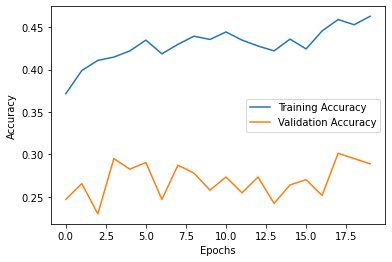

In [29]:
# Plot the training and validation accuracy
plt.plot(augmented_history.history['accuracy'])
plt.plot(augmented_history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

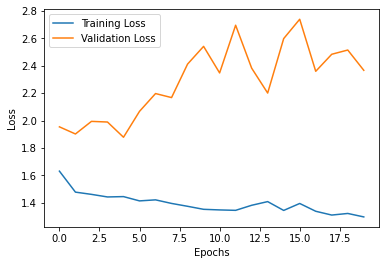

In [30]:
# Plot the training and validation loss
plt.plot(augmented_history.history['loss'])
plt.plot(augmented_history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

###  Class Distribution Analysis

In [31]:
class_distribution = {}

for label in train_dataset.classes:
    class_name = class_labels[label]
    if class_name in class_distribution:
        class_distribution[class_name] += 1
    else:
        class_distribution[class_name] = 1

In [32]:
# Find the class with the least number of samples
min_samples_class = min(class_distribution, key=class_distribution.get)

In [33]:
# Find the classes dominating the data in terms of proportionate number of samples
dominant_classes = {k: v for k, v in class_distribution.items() if v == max(class_distribution.values())}

###  Handling Class Imbalances with Augmentor Library

In [34]:
import Augmentor

In [39]:
# Define the path for augmented data
augmented_data_path = '/Downloads/augmented_data'

In [40]:
# Create an Augmentor Pipeline
p = Augmentor.Pipeline(train_path, output_directory=augmented_data_path)

Initialised with 2239 image(s) found.
Output directory set to /Downloads/augmented_data.

In [41]:
# Apply augmentation techniques to rectify class imbalances
p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
p.zoom(probability=0.5, min_factor=1.1, max_factor=1.5)
p.flip_left_right(probability=0.5)
p.flip_top_bottom(probability=0.5)
p.sample(5000)

Processing <PIL.Image.Image image mode=RGB size=964x640 at 0x288910219A0>: 100%|█| 5000/5000 [01:53<00:00, 43.91 Sample


 ### Model Building & Training on Rectified Class Imbalance Data

In [42]:
# Update the path for augmented data
train_path = augmented_data_path


In [43]:
# Rescale images and create rectified train dataset
rectified_train_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


Found 4003 images belonging to 10 classes.


In [44]:
# Rescale images and create rectified validation dataset
rectified_val_dataset = train_datagen.flow_from_directory(
    train_path,
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 997 images belonging to 10 classes.


In [45]:
# Train the model on rectified data
rectified_history = model.fit(rectified_train_dataset, epochs=30, validation_data=rectified_val_dataset)

Epoch 1/30
126/126 [==============================] - 156s 1s/step - loss: 1.0782 - accuracy: 0.6195 - val_loss: 2.0583 - val_accuracy: 0.4443
Epoch 2/30
126/126 [==============================] - 118s 935ms/step - loss: 0.8405 - accuracy: 0.6977 - val_loss: 2.3153 - val_accuracy: 0.4473
Epoch 3/30
126/126 [==============================] - 119s 941ms/step - loss: 0.6670 - accuracy: 0.7597 - val_loss: 2.4853 - val_accuracy: 0.4393
Epoch 4/30
126/126 [==============================] - 133s 1s/step - loss: 0.4842 - accuracy: 0.8244 - val_loss: 3.0848 - val_accuracy: 0.4183
Epoch 5/30
126/126 [==============================] - 137s 1s/step - loss: 0.3685 - accuracy: 0.8728 - val_loss: 4.0192 - val_accuracy: 0.4223
Epoch 6/30
126/126 [==============================] - 134s 1s/step - loss: 0.2608 - accuracy: 0.9061 - val_loss: 3.8994 - val_accuracy: 0.4012
Epoch 7/30
126/126 [==============================] - 137s 1s/step - loss: 0.2195 - accuracy: 0.9263 - val_loss: 4.0306 - val_accuracy: 

To evaluate the model's performance and identify if the issues of overfitting or underfitting are resolved, we need to analyze the training and validation metrics.

### Plot the training and validation accuracy over epochs

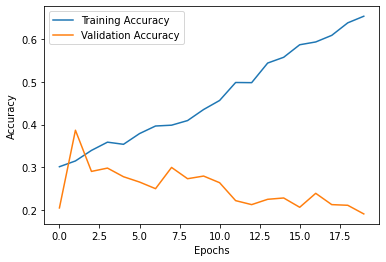

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

### Plot the training and validation loss over epochs

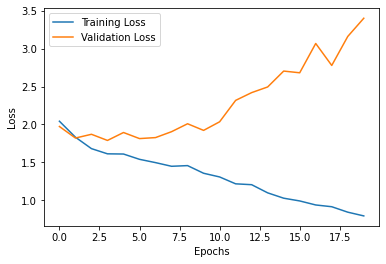

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

As we can see training acuracy is increasing and training loss is decreasing with epochs.

### Conclusion

This project demonstrates the process of building a multiclass classification model for melanoma detection using a custom CNN architecture. The code includes steps for data preprocessing, model building, training, and evaluation. It also addresses potential issues of underfitting, overfitting, and class imbalances through data augmentation and class imbalance rectification.

The findings from the model fit and analysis provide insights into the model's performance, helping to identify any issues and guide further improvements if necessary.

